# SF-DAT-21 | Codealong 07

In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import feature_selection, linear_model

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

## Activity: Model's F-statistic

In [2]:
df = pd.read_csv(os.path.join('..', '..', '07', 'datasets', 'zillow-07-starter.csv'), index_col = 'ID')

In [5]:
# TODO
model = smf.ols(formula = 'SalePrice ~ Size', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Thu, 17 Mar 2016   Prob (F-statistic):           2.67e-58
Time:                        19:37:59   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Accessing the model's F-value and its p-value

### F-value (with significance level of `5%`)

In [6]:
model.fvalue

297.41677094839412

### Corresponding p-value

In [7]:
model.f_pvalue

2.6676972357592908e-58

## Part A - Linear Modeling with `scikit-learn`

In [8]:
# TODO
subset_df = df.dropna(axis = 'index', subset = ['Size', 'LotSize', 'IsAStudio'])
subset_df.head(2)

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.15,0,NaN,2.0,1.43,2.435,1948
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5.60,0,2,3.5,2.04,3.920,1976


In [9]:
def linear_modeling_with_sklearn(X, y):
    model = linear_model.LinearRegression(fit_intercept = True)
    model.fit(X, y)

    print 'F-statistic (performed for each regressor independently)'
    print '- F-value', feature_selection.f_regression(X, y)[0]
    print '- p-value', feature_selection.f_regression(X, y)[1]
    print 'R^2 =', model.score(X, y)
    print 'Coefficients'
    print '- beta_0 (intercept) =', model.intercept_
    print '- beta_n (n > 0)     =', model.coef_

### SalePrice ~ IsAStudio with `smf.ols`

In [10]:
smf.ols(formula = 'SalePrice ~ IsAStudio', data = subset_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2519
Date:                Thu, 17 Mar 2016   Prob (F-statistic):              0.616
Time:                        19:38:55   Log-Likelihood:                -1159.0
No. Observations:                 545   AIC:                             2322.
Df Residuals:                     543   BIC:                             2331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.5571      0.088     17.615      0.000         1.383     1.731
IsAStudio      0.2589      0.516      0.502      0.616        -0.755     1.272
==============================================================================
Omnibus:                      860.527   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           301122.117
Skew:                           8.992   Prob(JB):                         0.00
Kurtosis:                     116.741   Cond. No.                         5.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### SalePrice ~ IsAStudio with `scikit-learn` (Simple Linear Modeling)

In [11]:
X = subset_df[ ['IsAStudio'] ]
y = subset_df['SalePrice']

linear_modeling_with_sklearn(X, y)

F-statistic (performed for each regressor independently)
- F-value [ 0.25187926]
- p-value [ 0.61595836]
R^2 = 0.000463650973037
Coefficients
- beta_0 (intercept) = 1.55707559924
- beta_n (n > 0)     = [ 0.2589244]


### SalePrice ~ Size + LotSize with `smf.ols`

In [12]:
smf.ols(formula = 'SalePrice ~ Size + LotSize', data = subset_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     78.29
Date:                Thu, 17 Mar 2016   Prob (F-statistic):           1.36e-30
Time:                        19:39:02   Log-Likelihood:                -1090.0
No. Observations:                 545   AIC:                             2186.
Df Residuals:                     542   BIC:                             2199.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1902      0.173     -1.098      0.273        -0.530     0.150
Size           0.8171      0.069     11.907      0.000         0.682     0.952
LotSize        0.0500      0.037      1.362      0.174        -0.022     0.122
==============================================================================
Omnibus:                      974.589   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           812622.772
Skew:                          11.225   Prob(JB):                         0.00
Kurtosis:                     190.833   Cond. No.                         9.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### SalePrice ~ IsAStudio with `scikit-learn` (Multiple Linear Modeling)

In [13]:
X = subset_df[ ['Size', 'LotSize'] ]
y = subset_df['SalePrice']

linear_modeling_with_sklearn(X, y)

F-statistic (performed for each regressor independently)
- F-value [ 154.47734612   11.74608887]
- p-value [  2.18094764e-31   6.55921409e-04]
R^2 = 0.224134357118
Coefficients
- beta_0 (intercept) = -0.190237755455
- beta_n (n > 0)     = [ 0.81709073  0.05004893]


# Advertising dataset

In [14]:
df = pd.read_csv(os.path.join('..', 'datasets', 'advertising.csv'))

In [15]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
193,38.2,3.7,13.8,7.6
194,94.2,4.9,8.1,9.7
195,177.0,9.3,6.4,12.8
196,283.6,42.0,66.2,25.5


## Plots

### Sales ~ TV

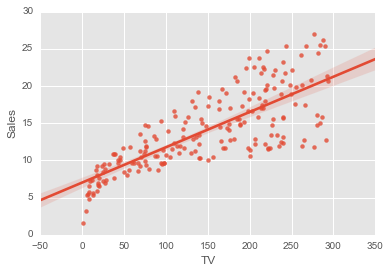

In [22]:
# TODO
#plt.scatter(df.Sales, df.TV)
sns.regplot(df.TV, df.Sales)

### Sales ~ Radio

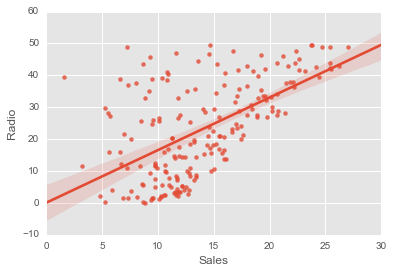

In [23]:
# TODO
sns.regplot(df.Sales, df.Radio)

### Sales ~ Newspaper

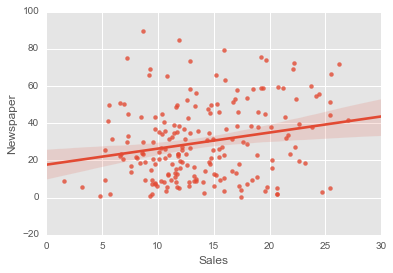

In [24]:
# TODO
sns.regplot(df.Sales, df.Newspaper)

## Simple linear regressions

### Sales ~ TV

In [26]:
model_tv = smf.ols(formula = 'Sales ~ TV', data = df).fit()
model_tv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     302.8
Date:                Thu, 17 Mar 2016   Prob (F-statistic):           1.29e-41
Time:                        19:44:16   Log-Likelihood:                -514.27
No. Observations:                 198   AIC:                             1033.
Df Residuals:                     196   BIC:                             1039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0306      0.462     15.219      0.000         6.120     7.942
TV             0.0474      0.003     17.400      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.404   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.551
Skew:                          -0.062   Prob(JB):                        0.759
Kurtosis:                       2.774   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Sales ~ Radio

In [27]:
model_radio = smf.ols(formula = 'Sales ~ Radio', data = df).fit()
model_radio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     97.69
Date:                Thu, 17 Mar 2016   Prob (F-statistic):           5.99e-19
Time:                        19:44:27   Log-Likelihood:                -566.70
No. Observations:                 198   AIC:                             1137.
Df Residuals:                     196   BIC:                             1144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.3166      0.560     16.622      0.000         8.211    10.422
Radio          0.2016      0.020      9.884      0.000         0.161     0.242
==============================================================================
Omnibus:                       20.193   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.115
Skew:                          -0.785   Prob(JB):                     9.56e-06
Kurtosis:                       3.582   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Sales ~ Newspaper

In [28]:
model_newspaper = smf.ols(formula = 'Sales ~ Newspaper', data = df).fit()
model_newspaper.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     9.927
Date:                Thu, 17 Mar 2016   Prob (F-statistic):            0.00188
Time:                        19:44:38   Log-Likelihood:                -601.84
No. Observations:                 198   AIC:                             1208.
Df Residuals:                     196   BIC:                             1214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.3193      0.639     19.274      0.000        11.059    13.580
Newspaper      0.0558      0.018      3.151      0.002         0.021     0.091
==============================================================================
Omnibus:                        5.835   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.303
Skew:                           0.333   Prob(JB):                       0.0706
Kurtosis:                       2.555   Cond. No.                         63.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residuals

### Sales ~ TV

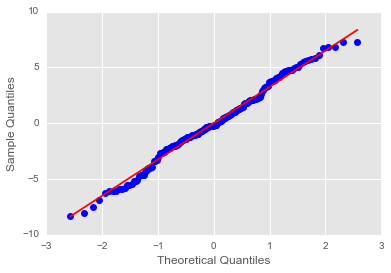

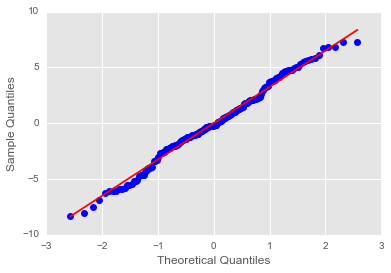

In [40]:
# TODO
#model_tv.resid
sm.qqplot(model_tv.resid, line='s')

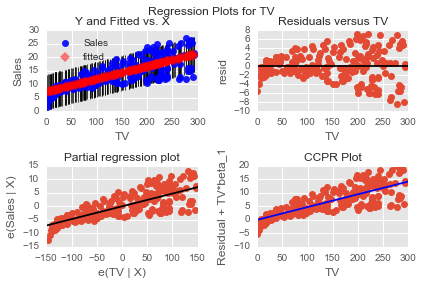

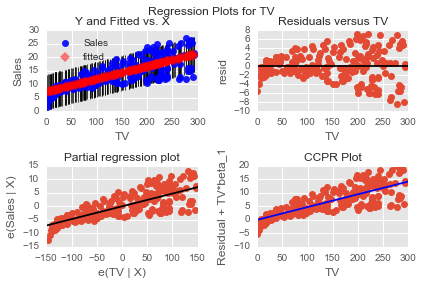

In [43]:
# TODO
sm.graphics.plot_regress_exog(model_tv, 'TV')

### Sales ~ Radio

In [ ]:
# TODO

In [ ]:
# TODO

### Sales ~ Newspaper

In [ ]:
# TODO

In [ ]:
# TODO

### Sales ~ TV + Radio + Newspaper

In [46]:
# TODO
model = smf.ols(formula = 'Sales ~ TV + Radio + Newspaper', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Thu, 17 Mar 2016   Prob (F-statistic):           8.35e-95
Time:                        20:22:08   Log-Likelihood:                -383.24
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9523      0.318      9.280      0.000         2.325     3.580
TV             0.0457      0.001     32.293      0.000         0.043     0.048
Radio          0.1886      0.009     21.772      0.000         0.171     0.206
Newspaper     -0.0012      0.006     -0.187      0.852        -0.014     0.011
==============================================================================
Omnibus:                       59.593   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.654
Skew:                          -1.324   Prob(JB):                     8.66e-33
Kurtosis:                       6.299   Cond. No.                         457.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Sales ~ TV + Radio

In [47]:
# TODO
model = smf.ols(formula = 'Sales ~ TV + Radio', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     834.4
Date:                Thu, 17 Mar 2016   Prob (F-statistic):           2.60e-96
Time:                        20:22:48   Log-Likelihood:                -383.26
No. Observations:                 198   AIC:                             772.5
Df Residuals:                     195   BIC:                             782.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9315      0.297      9.861      0.000         2.345     3.518
TV             0.0457      0.001     32.385      0.000         0.043     0.048
Radio          0.1880      0.008     23.182      0.000         0.172     0.204
==============================================================================
Omnibus:                       59.228   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.127
Skew:                          -1.321   Prob(JB):                     3.06e-32
Kurtosis:                       6.257   Cond. No.                         423.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# TODO

In [ ]:
# TODO

In [ ]:
# TODO

## Part B - Interaction Effects

### Sales ~ TV + Radio + TV * Radio

In [48]:
# TODO
# TODO
model = smf.ols(formula = 'Sales ~ TV + Radio + TV*Radio', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1934.
Date:                Thu, 17 Mar 2016   Prob (F-statistic):          3.19e-144
Time:                        20:23:41   Log-Likelihood:                -267.07
No. Observations:                 198   AIC:                             542.1
Df Residuals:                     194   BIC:                             555.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.7577      0.247     27.304      0.000         6.270     7.246
TV             0.0190      0.002     12.682      0.000         0.016     0.022
Radio          0.0276      0.009      3.089      0.002         0.010     0.045
TV:Radio       0.0011   5.27e-05     20.817      0.000         0.001     0.001
==============================================================================
Omnibus:                      126.182   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1151.060
Skew:                          -2.306   Prob(JB):                    1.12e-250
Kurtosis:                      13.875   Cond. No.                     1.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# TODO

In [ ]:
# TODO

In [ ]:
# TODO

In [ ]:
# TODO

## Part C - Dummy Variables

In [3]:
df = pd.read_csv(os.path.join('..', '..', '07', 'datasets', 'zillow-07-starter.csv'), index_col = 'ID')

In [4]:
# TODO
df.head(2)

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,0.71,0,1,NaN,0.55,NaN,1980
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.15,0,NaN,2,1.43,2.435,1948


In [ ]:
# TODO


### What's the bathrooms' distribution in the dataset?

In [5]:
# TODO
print np.nan, df.BathCount.isnull().sum()
for bath_count in np.sort(df.BedCount.dropna().unique()):
    print bath_count, len(df[df.BathCount == bath_count])

nan 58
1.0 343
2.0 326
3.0 105
4.0 33
5.0 10
6.0 8
7.0 2
8.0 1
9.0 0


### Let's keep properties with 1, 2, 3, or 4 bathrooms

In [6]:
# TODO
df = df[df.BathCount.isin([1, 2, 3, 4])]

In [7]:
# TODO
print np.nan, df.BathCount.isnull().sum()
for bath_count in np.sort(df.BathCount.unique()):
    print bath_count, len(df[df.BathCount == bath_count])

nan 0
1.0 343
2.0 326
3.0 105
4.0 33


### We can create the dummy variables manually

In [8]:
# TODO
df['Bath_1'] = 0
df.loc[df.BathCount == 1, 'Bath_1'] = 1

df['Bath_2'] = 0
df.loc[df.BathCount == 2, 'Bath_2'] = 1

df['Bath_3'] = 0
df.loc[df.BathCount == 3, 'Bath_3'] = 1

df['Bath_4'] = 0
df.loc[df.BathCount == 4, 'Bath_4'] = 1

df.columns

Index([u'Address', u'DateOfSale', u'SalePrice', u'IsAStudio', u'BedCount',
       u'BathCount', u'Size', u'LotSize', u'BuiltInYear', u'Bath_1', u'Bath_2',
       u'Bath_3', u'Bath_4'],
      dtype='object')

### But we can also use `get_dummies` from `pandas` as well (on `BedCount` for the sake of variety)

In [ ]:
# TODO

beds_df

In [ ]:
df = df.join([beds_df])

df.columns

### `SalesPrice` as a function of `Bath_2`, `Bath_3`, and `Bath_4`

In [9]:
# TODO
smf.ols(formula = 'SalePrice ~ Bath_2 + Bath_3 + Bath_4', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     12.09
Date:                Thu, 17 Mar 2016   Prob (F-statistic):           9.56e-08
Time:                        21:03:07   Log-Likelihood:                -1333.0
No. Observations:                 807   AIC:                             2674.
Df Residuals:                     803   BIC:                             2693.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9877      0.068     14.456      0.000         0.854     1.122
Bath_2         0.2871      0.098      2.933      0.003         0.095     0.479
Bath_3         0.4845      0.141      3.433      0.001         0.207     0.762
Bath_4         1.2158      0.231      5.272      0.000         0.763     1.668
==============================================================================
Omnibus:                     1842.456   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8165535.663
Skew:                          19.817   Prob(JB):                         0.00
Kurtosis:                     494.193   Cond. No.                         5.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### `SalesPrice` as a function of `Bath_1`, `Bath_3`, and `Bath_4`

In [11]:
# TODO
smf.ols(formula = 'SalePrice ~ Bath_1 + Bath_3 + Bath_4', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     12.09
Date:                Thu, 17 Mar 2016   Prob (F-statistic):           9.56e-08
Time:                        21:03:16   Log-Likelihood:                -1333.0
No. Observations:                 807   AIC:                             2674.
Df Residuals:                     803   BIC:                             2693.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.2747      0.070     18.189      0.000         1.137     1.412
Bath_1        -0.2871      0.098     -2.933      0.003        -0.479    -0.095
Bath_3         0.1974      0.142      1.390      0.165        -0.081     0.476
Bath_4         0.9287      0.231      4.018      0.000         0.475     1.382
==============================================================================
Omnibus:                     1842.456   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8165535.663
Skew:                          19.817   Prob(JB):                         0.00
Kurtosis:                     494.193   Cond. No.                         5.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_4`

In [12]:
# TODO
smf.ols(formula = 'SalePrice ~ Bath_1 + Bath_2 + Bath_4', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     12.09
Date:                Thu, 17 Mar 2016   Prob (F-statistic):           9.56e-08
Time:                        21:06:09   Log-Likelihood:                -1333.0
No. Observations:                 807   AIC:                             2674.
Df Residuals:                     803   BIC:                             2693.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.4722      0.123     11.922      0.000         1.230     1.715
Bath_1        -0.4845      0.141     -3.433      0.001        -0.762    -0.207
Bath_2        -0.1974      0.142     -1.390      0.165        -0.476     0.081
Bath_4         0.7313      0.253      2.896      0.004         0.236     1.227
==============================================================================
Omnibus:                     1842.456   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8165535.663
Skew:                          19.817   Prob(JB):                         0.00
Kurtosis:                     494.193   Cond. No.                         7.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_3`

In [13]:
# TODO
smf.ols(formula = 'SalePrice ~ Bath_1 + Bath_2 + Bath_3', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     12.09
Date:                Thu, 17 Mar 2016   Prob (F-statistic):           9.56e-08
Time:                        21:06:12   Log-Likelihood:                -1333.0
No. Observations:                 807   AIC:                             2674.
Df Residuals:                     803   BIC:                             2693.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.2035      0.220     10.003      0.000         1.771     2.636
Bath_1        -1.2158      0.231     -5.272      0.000        -1.668    -0.763
Bath_2        -0.9287      0.231     -4.018      0.000        -1.382    -0.475
Bath_3        -0.7313      0.253     -2.896      0.004        -1.227    -0.236
==============================================================================
Omnibus:                     1842.456   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8165535.663
Skew:                          19.817   Prob(JB):                         0.00
Kurtosis:                     494.193   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""